In [2]:
import sys
sys.path.append('/Users/erikweilandt/Library/Caches/pypoetry/virtualenvs/tepem-FeojsIC2-py3.11/lib/python3.11/site-packages')

In [3]:
import numpy as np

In [4]:
num_slice = 4

In [5]:
x = np.linspace(0, 10, 2* num_slice + 1)
x

array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ])

In [6]:
y = np.array([foo*2 for foo in x ])
y

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ])

In [7]:
total = np.vstack((x,y)).T
total

array([[ 0.  ,  0.  ],
       [ 1.25,  2.5 ],
       [ 2.5 ,  5.  ],
       [ 3.75,  7.5 ],
       [ 5.  , 10.  ],
       [ 6.25, 12.5 ],
       [ 7.5 , 15.  ],
       [ 8.75, 17.5 ],
       [10.  , 20.  ]])

In [8]:
ltg = np.arange(0, 2*num_slice+1)
ltg

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
ltg2 = np.arange(2*num_slice+1, 4*num_slice+2)
ltg2

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [10]:
mod = np.ones(2*num_slice+1, dtype= int)
for i, num in enumerate(mod, 1):
    if i%2==0:
        mod[i] +=1
    mod[-1] = 1
ltg_edit = np.repeat(ltg, mod)#.reshape((num_slice, 3))
ltg_edit, mod

(array([0, 1, 2, 2, 3, 4, 4, 5, 6, 6, 7, 8]),
 array([1, 1, 2, 1, 2, 1, 2, 1, 1]))

In [11]:
ltg_edit2 = np.repeat(ltg2, mod).reshape((num_slice, 3))
ltg_edit2

array([[ 9, 10, 11],
       [11, 12, 13],
       [13, 14, 15],
       [15, 16, 17]])

In [12]:
for slab in ltg_edit:
    print(slab)

0
1
2
2
3
4
4
5
6
6
7
8


# LTG Map

In [13]:
def generate_ltg(
    num_slabs: int, fe_order, velocity_ltg: bool = False
) :
    num_dof_rhs = fe_order[1]
    if velocity_ltg:
        num_dof_rhs = num_dof_rhs - 2
    num_loc_dof = (fe_order[0] + 1) * (num_dof_rhs + 1)
    ltg = np.arange(num_loc_dof * num_slabs).reshape((num_slabs, num_loc_dof))
    for i, _ in enumerate(ltg):
        ltg[i] = ltg[i] - (num_dof_rhs+1) * i
    return ltg
test = generate_ltg(3, (2,2))#, velocity_ltg=True)
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
       [12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [14]:
lt = [1,2,3,4,5]
lt_a = np.array(lt).T
lt_a[4:]

array([5])

In [15]:
NU = 100
PRESSURE_GRAD = -1
C_CONST = 1 / 2 * 1 / NU * (-PRESSURE_GRAD)
RADIUS = 1
LENGTH = 10


def g_1(x_1: float, x_2: float) -> float:
    if x_1 < 1e-14:
        return C_CONST * (RADIUS - x_2) * (x_2 + RADIUS)
    else:
        return 0

# chebychev points

In [16]:
def get_chebby_points(start, end, num):
    ref_points = [-np.cos(np.pi * i / num) for i in range(num+1)]
    interval_points = [map_min1plus1_to_ab(x, start, end) for x in ref_points]
    return np.array(interval_points)

def map_min1plus1_to_ab(x,a, b):
    return (b-a)/2 * x + (a+b)/2

get_chebby_points(-1,1,4)

array([-1.00000000e+00, -7.07106781e-01, -6.12323400e-17,  7.07106781e-01,
        1.00000000e+00])

# high resolution plot

In [17]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv.flatten(), yv.flatten()
xv



array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [18]:
test = [1,2,3,4,5,6]
test = np.array(test)
test.reshape((3,2))
test

array([1, 2, 3, 4, 5, 6])

# Parameterising Curve

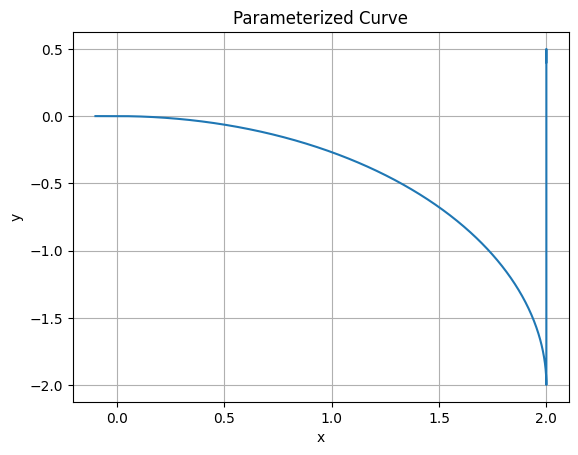

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter range from 0 to 1
t = np.linspace(-0.1, 0.6, 1000)

# Define the parameters a and b for your curve
a = 0 # Adjust as needed
b = 0.5  # Adjust as needed

# Define the x and y coordinates based on the parameterization
x = np.piecewise(t, [t < a, (t >= a) & (t <= b), t > b], [lambda t: t, lambda t: 2*np.sin(np.pi *t), 2])
y = np.piecewise(t, [t < a, (t >= a) & (t <= b), t > b], [lambda t: 0, lambda t: 2*np.cos(np.pi *t)-2, lambda t: -1-(t-2)])

# Plot the curve
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parameterized Curve")
plt.grid(True)
plt.show()


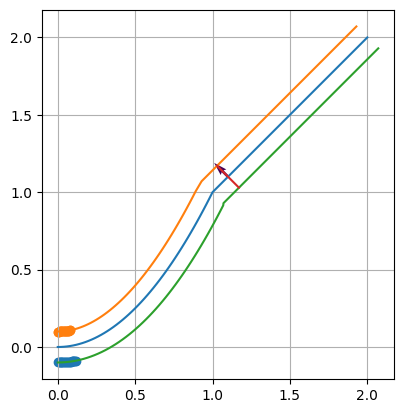

In [25]:
import matplotlib.pyplot as plt

# splitting_points = [1]

piecewise_y = [lambda s: s**2, lambda s: s]
piecewise_x = [lambda s: s, lambda s:s]
deriv_y = [lambda s: 2*s, lambda s: 1]
deriv_x = [lambda s: 1, lambda s: 1]

radius = 0.1

def r_of_s(s):
    if s<1:
        return piecewise_x[0](s), piecewise_y[0](s)
    if s>=1:
        return piecewise_x[1](s), piecewise_y[1](s)
    
def normal(s):
    if s<1:
        x,y = -deriv_y[0](s), deriv_x[0](s)
        norm = np.sqrt(deriv_x[0](s)**2 + deriv_y[0](s)**2)
        return x/norm, y/norm
    if s>=1:
        x,y = -deriv_y[1](s), deriv_x[1](s)
        norm = np.sqrt(deriv_x[1](s)**2 + deriv_y[1](s)**2)
        return x/norm, y/norm

def upper_bdn(s):
    x =r_of_s(s)[0] + radius * normal(s)[0]
    y = r_of_s(s)[1] + radius * normal(s)[1]
    return x,y


def lower_bdn(s):
    x =r_of_s(s)[0] - radius * normal(s)[0]
    y = r_of_s(s)[1] - radius * normal(s)[1]
    return x,y

num_slabs = 10
len_dom = 2

dx = np.linspace(0,len_dom, 2*num_slabs+1)
x_coords_low = np.array([lower_bdn(val)[0] for val in dx])
y_coords_low = np.array([lower_bdn(val)[1] for val in dx])
x_coords_up = np.array([upper_bdn(val)[0] for val in dx])
y_coords_up = np.array([upper_bdn(val)[1] for val in dx])
    
s = np.linspace(0,2, 101)
fig, ax = plt.subplots()
ax.plot([r_of_s(val)[0] for val in s], [r_of_s(val)[1] for val in s])
ax.plot([upper_bdn(val)[0] for val in s], [upper_bdn(val)[1] for val in s])
ax.plot([lower_bdn(val)[0] for val in s], [lower_bdn(val)[1] for val in s])

ax.plot([upper_bdn(1.1)[0], lower_bdn(1.1)[0]], [upper_bdn(1.1)[1], lower_bdn(1.1)[1]])
ax.quiver(r_of_s(1.1)[0],r_of_s(1.1)[1], normal(1.1)[0], normal(1.1)[1], radius)
ax.scatter(x_coords_low, y_coords_low)
ax.scatter(x_coords_up, y_coords_up)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
plt.show()

In [21]:
test_list = [(1,2), (3,4)]
test_a = np.array(test_list)
test_a

array([[1, 2],
       [3, 4]])

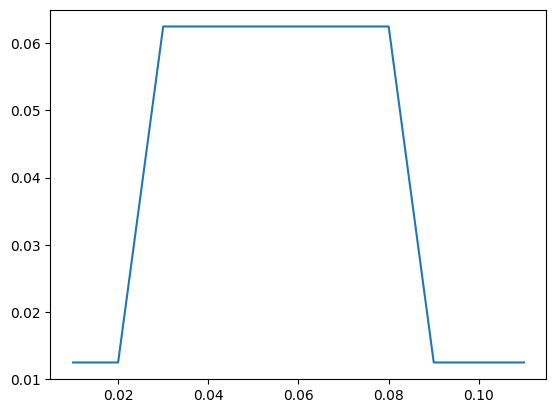

In [53]:
from typing import Tuple


def sudden_linear(
    s: float,
    m: float = 0,
    n: float = 0.0125,
    start: float = 0.02,
    end: float = 0.09,
    change_layer: float = 0.01,
    gradient: float = 5,
) -> float:
    if s <= start or s > end:
        return m * s + n
    n_incl = 0.0125 - gradient * start
    if s > start and s <= start + change_layer:
        return gradient * s + n_incl
    upper_point = gradient * (start + change_layer) + n_incl
    n_decl = 0.0125 + gradient * end
    if s > start + change_layer and s <= end - change_layer:
        return m * s + upper_point
    else:
        return -gradient * s + n_decl

s = np.linspace(0.01,0.11, 101)
fig, ax = plt.subplots()
ax.plot(s, [sudden_linear(val) for val in s])

plt.show()